# THE BATTLE OF NEIGHBORHOODS

## Introduction

Bangkok is the capital of Thailand, in the Asian South-East. It has more than 8 millions inhabitants and, 
last data, more than 22 millions tourists, per year. An Italian entrepreneur has asked us to evaluate areas
close (in a radius of 500 meters) to BTS stops and check the competitors, specifically around two stops
in spots full of expats and considered trendy: Ari and Thong Lo. The restaurant they want to open is a traditional
Pizza Place, offering slices of pizza (in Thailand a whole pizza, like it is offered in Italy, is considered
too big), gelato (the italian high quality version of ice-cream) and coffee specialties like espresso and
cappuccino. We will use Folium Maps to check the areas, and the Foursquare API, in order to do so, eventually scraping Tripadvisor to check the reviews of selected competitors.

## Data

We are going to massively use the Foursquare API, to check the venues in specific areas of Bangkok. We will use the Folium library to show them. We will also be scraping Tripadvisor to check reviews on the two main pizza places in the two neighborhoods, producing a wordcloud.

## Bangkok and its districts

In [1]:
# importing libraries
import pandas as pd
import folium
import requests

In [2]:
# Scraping Wikipedia to see the districts of Bangkok
bkk_dist = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok')
bkk_dist = bkk_dist[0]

# Adding the missing coordinates
# Bang Bon coordinates
bkk_dist.iloc[0,-2] = 13.6592
bkk_dist.iloc[0,-1] = 100.3991

# Khan Na Yao coordinates
bkk_dist.iloc[19,-2] = 13.8271
bkk_dist.iloc[19,-1] = 100.6743

# Thawi Watthana coordinates
bkk_dist.iloc[44,-2] = 13.7878
bkk_dist.iloc[44,-1] = 100.3638

# Thung Khru coordinates
bkk_dist.iloc[46,-2] = 13.6472
bkk_dist.iloc[46,-1] = 100.4958

# Wang Thonglang coordinates
bkk_dist.iloc[47,-2] = 13.7864
bkk_dist.iloc[47,-1] = 100.6087

In [3]:
# Showing a map of Bangkok with its 50 districts, just to check that everything works okay
latitude = 13.7563
longitude = 100.5018
map_bangkok = folium.Map(location=[latitude, longitude], zoom_start=11)

for i in range(len(bkk_dist)):
    folium.Marker(location=[bkk_dist.iloc[i,-2], bkk_dist.iloc[i,-1]], icon=folium.Icon(color='blue', icon='building', prefix='fa')).add_to(map_bangkok)
map_bangkok

In [4]:
# Foursquare 
CLIENT_ID = 'BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH' # your Foursquare ID
CLIENT_SECRET = '1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH
CLIENT_SECRET:1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2


## <u>Ari BTS Station</u>

In [5]:
# create map of Bangkok around the Ari BTS Station using its latitude and longitude
latitude = 13.7796
longitude = 100.5446
map_bangkok_ari = folium.Map(location=[latitude, longitude], zoom_start=17)

folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='orange', icon='train', prefix='fa')).add_to(map_bangkok_ari)
map_bangkok_ari

In [6]:
# Searching for pizza places at not more than 500 mts from the Ari BTS stop
LL = str(latitude) + ', ' + str(longitude)
RADIUS =500
CATEGORY_ID = '4bf58dd8d48988d1ca941735' # PIZZA PLACES CATEGORY ID
LIMIT = 50 # MAXIMUM VALUE
url = 'https://api.foursquare.com/v2/venues/search?ll={}&radius={}&categoryId={}&client_id={}&client_secret={}&v={}&limit={}'.format(
    LL,
    RADIUS,
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LIMIT
)

url

'https://api.foursquare.com/v2/venues/search?ll=13.7796, 100.5446&radius=500&categoryId=4bf58dd8d48988d1ca941735&client_id=BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH&client_secret=1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2&v=20180605&limit=50'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df8f7d51a4b0a001b1ad4fd'},
 'response': {'venues': [{'id': '4e62f98162e13e3bcee4427d',
    'name': 'The Pizza Company (เดอะ พิซซ่า คอมปะนี)',
    'location': {'address': 'Phahon Yothin Rd.',
     'lat': 13.781437766403533,
     'lng': 100.54528204454901,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.781437766403533,
       'lng': 100.54528204454901}],
     'distance': 217,
     'cc': 'TH',
     'city': 'พญาไท',
     'state': 'กรุงเทพมหานคร',
     'country': 'ประเทศไทย',
     'formattedAddress': ['Phahon Yothin Rd.',
      'พญาไท',
      'กรุงเทพมหานคร',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1576597433',
    'hasPerk': False},
   {'id': '4b4dc2e9f964a52011d7

In [8]:
# importing library to normalize the json data
from pandas.io.json import json_normalize

venues = results['response']['venues']
    
bkk_pizza_ari = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['id',
                    'name', 
                    'location.lat', 
                    'location.lng',
                    'location.address'
                   ]
bkk_pizza_ari = bkk_pizza_ari.loc[:, filtered_columns]

# clean columns
bkk_pizza_ari.columns = [col.split(".")[-1] for col in bkk_pizza_ari.columns]

bkk_pizza_ari

,id,name,lat,lng,address
0,4e62f98162e13e3bcee4427d,The Pizza Company (เดอะ พิซซ่า คอมปะนี),13.781438,100.545282,Phahon Yothin Rd.
1,4b4dc2e9f964a52011d726e3,Basilico (บาซิลิโก),13.782073,100.543564,34 Phahon Yothin 7
2,4bfcb4f2bf6576b0584bacb8,Italian Job (อิตาเลียน จ็อบ),13.780013,100.544944,La Villa
3,4e8866d46c25eede899f35d8,The Pizza Companny,13.776340,100.543337,ซ.พหลโยธิน2
4,4c834319d4e23704edb96f88,The Pizza Company @ soi phahonyothin4th,13.777538,100.546210,ปากซอยพหลโยธิน4
5,4d11dcbd85db5481e63fc321,Raan Labudon,13.780276,100.543911,NaN


In [9]:
# Pizza Company is definitely not an italian place, as Raan Labudon
# Results order could change, so we use their names to cancel them
row_to_del = []
for i in range(len(bkk_pizza_ari)):
    if (bkk_pizza_ari.iloc[i,1].find('Pizza Compa') > -1):
        row_to_del.append(i)
    elif (bkk_pizza_ari.iloc[i,1].find('Raan Labudon') > -1):
        row_to_del.append(i)
bkk_pizza_ari = bkk_pizza_ari.drop(row_to_del, axis=0).reset_index().drop('index', axis=1)
bkk_pizza_ari

,id,name,lat,lng,address
0,4b4dc2e9f964a52011d726e3,Basilico (บาซิลิโก),13.782073,100.543564,34 Phahon Yothin 7
1,4bfcb4f2bf6576b0584bacb8,Italian Job (อิตาเลียน จ็อบ),13.780013,100.544944,La Villa


In [10]:
# importing library
import json

# checking the rating of the first restaurant in our list
bkk_pizza_ari_plus = pd.DataFrame(index=[0,1], columns=['price', 'likes', 'rating'])
url = 'https://api.foursquare.com/v2/venues/'
for i in range(len(bkk_pizza_ari)):
    VENUE_ID = bkk_pizza_ari.iloc[i,0]
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION
    )
    results = requests.get(url=url+VENUE_ID, params=params)
    data = json.loads(results.text)
    try:
        bkk_pizza_ari_plus.iloc[i,0] = data['response']['venue']['price']['message']
    except:
        bkk_pizza_ari_plus.iloc[i,0] = "no price"
    try:
        bkk_pizza_ari_plus.iloc[i,1] = data['response']['venue']['likes']['count']
    except:
        bkk_pizza_ari_plus.iloc[i,1] = "no likes"
    try:
        bkk_pizza_ari_plus.iloc[i,2] = data['response']['venue']['rating']
    except:
        bkk_pizza_ari_plus.iloc[i,2] = "no rating"

In [11]:
bkk_pizza_ari = pd.concat([bkk_pizza_ari, bkk_pizza_ari_plus], axis=1)
bkk_pizza_ari

,id,name,lat,lng,address,price,likes,rating
0,4b4dc2e9f964a52011d726e3,Basilico (บาซิลิโก),13.782073,100.543564,34 Phahon Yothin 7,Expensive,27,7.1
1,4bfcb4f2bf6576b0584bacb8,Italian Job (อิตาเลียน จ็อบ),13.780013,100.544944,La Villa,Expensive,10,5.4


In [12]:
# removing every pizza place with a rating inferior to 6
for i in range(len(bkk_pizza_ari)):
    if bkk_pizza_ari.iloc[i, -1] < 6:
        bkk_pizza_ari.drop(i, axis=0, inplace=True)
bkk_pizza_ari

,id,name,lat,lng,address,price,likes,rating
0,4b4dc2e9f964a52011d726e3,Basilico (บาซิลิโก),13.782073,100.543564,34 Phahon Yothin 7,Expensive,27,7.1


In [13]:
# adding markers to the Bangok map around the Ari Station
for lat, lng, name, address in zip(bkk_pizza_ari['lat'], bkk_pizza_ari['lng'], bkk_pizza_ari['name'], bkk_pizza_ari['address']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#ff0000',
        fill=True,
        fill_color='#f00f00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok_ari)  

### GELATO

In [14]:
# Searching for ice-cream shops, with the word 'gelato' in their name
# at not more than 500 mts from the Ari BTS stop
CATEGORY_ID = '4bf58dd8d48988d1c9941735' # ICE CREAM SHOP CATEGORY ID
QUERY = 'gelato'
url = 'https://api.foursquare.com/v2/venues/search?ll={}&query={}&radius={}&categoryId={}&client_id={}&client_secret={}&v={}&limit={}'.format(
    LL,
    QUERY,
    RADIUS,
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/search?ll=13.7796, 100.5446&query=gelato&radius=500&categoryId=4bf58dd8d48988d1c9941735&client_id=BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH&client_secret=1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2&v=20180605&limit=50'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df8f79a3907e73e1011417d'},
 'response': {'venues': [{'id': '507677d6e4b051090624fda2',
    'name': 'Gelato Villa Aree',
    'location': {'address': 'La Villa Aree',
     'lat': 13.781373125765265,
     'lng': 100.54592485480843,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.781373125765265,
       'lng': 100.54592485480843}],
     'distance': 243,
     'postalCode': '10400',
     'cc': 'TH',
     'state': 'กรุงเทพมหานคร',
     'country': 'ประเทศไทย',
     'formattedAddress': ['La Villa Aree',
      'กรุงเทพมหานคร 10400',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d1c9941735',
      'name': 'Ice Cream Shop',
      'pluralName': 'Ice Cream Shops',
      'shortName': 'Ice Cream',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1576597454',
    'hasPerk': False},
   {'id': '55ea7d5c498ee151a6e81ab9',
    'name': "

In [16]:
venues = results['response']['venues']
    
bkk_gelato_ari = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['id',
                    'name', 
                    'location.lat', 
                    'location.lng',
                    'location.address'
                   ]
bkk_gelato_ari = bkk_gelato_ari.loc[:, filtered_columns]

# clean columns
bkk_gelato_ari.columns = [col.split(".")[-1] for col in bkk_gelato_ari.columns]

bkk_gelato_ari

,id,name,lat,lng,address
0,507677d6e4b051090624fda2,Gelato Villa Aree,13.781373,100.545925,La Villa Aree
1,55ea7d5c498ee151a6e81ab9,D'Viva Gelato (เดอะ-วีว่า เจลาโต้),13.781635,100.542700,ซ.อารีย์ 3


We keep them both

In [17]:
# checking rating, likes and price
bkk_gelato_ari_plus = pd.DataFrame(index=[0,1], columns=['price', 'likes', 'rating'])
url = 'https://api.foursquare.com/v2/venues/'
for i in range(len(bkk_gelato_ari)):
    VENUE_ID = bkk_gelato_ari.iloc[i,0]
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION
    )
    results = requests.get(url=url+VENUE_ID, params=params)
    data = json.loads(results.text)
    try:
        bkk_gelato_ari_plus.iloc[i,0] = data['response']['venue']['price']['message']
    except:
        bkk_gelato_ari_plus.iloc[i,0] = "no price"
    try:
        bkk_gelato_ari_plus.iloc[i,1] = data['response']['venue']['likes']['count']
    except:
        bkk_gelato_ari_plus.iloc[i,1] = "no likes"
    try:
        bkk_gelato_ari_plus.iloc[i,2] = data['response']['venue']['rating']
    except:
        bkk_gelato_ari_plus.iloc[i,2] = "no rating"

In [18]:
bkk_gelato_ari = pd.concat([bkk_gelato_ari, bkk_gelato_ari_plus], axis=1)
bkk_gelato_ari

,id,name,lat,lng,address,price,likes,rating
0,507677d6e4b051090624fda2,Gelato Villa Aree,13.781373,100.545925,La Villa Aree,Moderate,0,no rating
1,55ea7d5c498ee151a6e81ab9,D'Viva Gelato (เดอะ-วีว่า เจลาโต้),13.781635,100.542700,ซ.อารีย์ 3,Moderate,3,no rating


We keep both of them

In [19]:
# add markers to map
for lat, lng, name, address in zip(bkk_gelato_ari['lat'], bkk_gelato_ari['lng'], bkk_gelato_ari['name'], bkk_gelato_ari['address']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#0080ff',
        fill=True,
        fill_color='#0080ff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok_ari)

###  ESPRESSO

In [20]:
# Searching for coffee shops, with the word espresso in their name,
# at not more than 500 mts from the Ari BTS stop
CATEGORY_ID = '4bf58dd8d48988d1e0931735' # COFFEE SHOP CATEGORY ID
QUERY = 'espresso'
url = 'https://api.foursquare.com/v2/venues/search?ll={}&query={}&radius={}&categoryId={}&client_id={}&client_secret={}&v={}&limit={}'.format(
    LL,
    QUERY,
    RADIUS,
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/search?ll=13.7796, 100.5446&query=espresso&radius=500&categoryId=4bf58dd8d48988d1e0931735&client_id=BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH&client_secret=1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2&v=20180605&limit=50'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df8f7dd0be7b43a12451fa8'},
 'response': {'venues': [{'id': '4f2cf81ce4b006ef98a049e3',
    'name': 'The Espresso Bar (ดิ เอสเพรสโซ่ บาร์)',
    'location': {'address': '19/3 Soi Ari 4 (Nua)',
     'crossStreet': 'Phahon Yothin 7',
     'lat': 13.783804047183525,
     'lng': 100.54354043593045,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.783804047183525,
       'lng': 100.54354043593045}],
     'distance': 481,
     'postalCode': '10400',
     'cc': 'TH',
     'city': 'พญาไท',
     'state': 'กรุงเทพมหานคร',
     'country': 'ประเทศไทย',
     'formattedAddress': ['19/3 Soi Ari 4 (Nua) (Phahon Yothin 7)',
      'พญาไท',
      'กรุงเทพมหานคร 10400',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      '

In [22]:
venues = results['response']['venues']
    
bkk_espresso_ari = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['id',
                    'name', 
                    'location.lat', 
                    'location.lng',
                    'location.address'
                   ]
bkk_espresso_ari = bkk_espresso_ari.loc[:, filtered_columns]

# clean columns
bkk_espresso_ari.columns = [col.split(".")[-1] for col in bkk_espresso_ari.columns]

bkk_espresso_ari

,id,name,lat,lng,address
0,4f2cf81ce4b006ef98a049e3,The Espresso Bar (ดิ เอสเพรสโซ่ บาร์),13.783804,100.543540,19/3 Soi Ari 4 (Nua)
1,503c5a41e4b0f8bcbe90eb6c,Bangkok Espresso Bar,13.780212,100.544292,Phahon Yothin Rd


In [23]:
# checking the rating of the first espresso place in our list
bkk_espresso_ari_plus = pd.DataFrame(index=[0,1], columns=['price', 'likes', 'rating'])
url = 'https://api.foursquare.com/v2/venues/'
for i in range(len(bkk_espresso_ari)):
    VENUE_ID = bkk_espresso_ari.iloc[i,0]
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION
    )
    results = requests.get(url=url+VENUE_ID, params=params)
    data = json.loads(results.text)
    try:
        bkk_espresso_ari_plus.iloc[i,0] = data['response']['venue']['price']['message']
    except:
        bkk_espresso_ari_plus.iloc[i,0] = "no price"
    try:
        bkk_espresso_ari_plus.iloc[i,1] = data['response']['venue']['likes']['count']
    except:
        bkk_espresso_ari_plus.iloc[i,1] = "no likes"
    try:
        bkk_espresso_ari_plus.iloc[i,2] = data['response']['venue']['rating']
    except:
        bkk_espresso_ari_plus.iloc[i,2] = "no rating"
bkk_espresso_ari_plus

,price,likes,rating
0,Cheap,3,no rating
1,Cheap,23,7.4


In [24]:
bkk_espresso_ari = pd.concat([bkk_espresso_ari, bkk_espresso_ari_plus], axis=1)
bkk_espresso_ari

,id,name,lat,lng,address,price,likes,rating
0,4f2cf81ce4b006ef98a049e3,The Espresso Bar (ดิ เอสเพรสโซ่ บาร์),13.783804,100.543540,19/3 Soi Ari 4 (Nua),Cheap,3,no rating
1,503c5a41e4b0f8bcbe90eb6c,Bangkok Espresso Bar,13.780212,100.544292,Phahon Yothin Rd,Cheap,23,7.4


We don't delete any of them, keeping in mind that Bangkok Espresso Bar has a good rating and a decent number of likes.

In [25]:
# add markers to map
for lat, lng, name, address in zip(bkk_espresso_ari['lat'], bkk_espresso_ari['lng'], bkk_espresso_ari['name'], bkk_espresso_ari['address']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#80bbff',
        fill=True,
        fill_color='#80bbff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok_ari)  

The pizza place "Italian Job" and the coffee shop "Bangkok Espresso Bar" are very close to the Ari BTS Station.

In [26]:
coordinates = [
     [  13.782073,     100.543564],
     [  13.781635,     100.542700],
     [  13.780212,     100.544292]]

# Create the map and add the line
folium.PolyLine(coordinates, color='black').add_to(map_bangkok_ari)
# map_bangkok_ari.line(coordinates, line_color='#000000', line_weight=5)
map_bangkok_ari
 # m.create_map(path='line_example.html')

## <u>Thong Lo BTS Station</u>

In [27]:
# creating map of Bangkok using latitude and longitude values
latitude = 13.7384
longitude = 100.5663
map_bangkok_thonglo = folium.Map(location=[latitude, longitude], zoom_start=17)

folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='orange', icon='train', prefix='fa')).add_to(map_bangkok_thonglo)
map_bangkok_thonglo

### PIZZA

In [28]:
# Searching for pizza places at not more than 500 mts from the Thong Lo BTS stop
LL = str(latitude) + ', ' + str(longitude)
RADIUS =500
CATEGORY_ID = '4bf58dd8d48988d1ca941735' # PIZZA PLACES CATEGORY ID
LIMIT = 50 # MAXIMUM VALUE
url = 'https://api.foursquare.com/v2/venues/search?ll={}&radius={}&categoryId={}&client_id={}&client_secret={}&v={}&limit={}'.format(
    LL,
    RADIUS,
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LIMIT
)

url

'https://api.foursquare.com/v2/venues/search?ll=13.7384, 100.5663&radius=500&categoryId=4bf58dd8d48988d1ca941735&client_id=BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH&client_secret=1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2&v=20180605&limit=50'

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df8f7c69388d7001b060cfd'},
 'response': {'venues': [{'id': '5ba9148407190200250e8805',
    'name': 'BLEND BISTRO & WINE BAR',
    'location': {'address': 'No84. Sukhumvit road soi 23',
     'crossStreet': 'soi Prasanmitr',
     'lat': 13.740156301379875,
     'lng': 100.56393384933472,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.740156301379875,
       'lng': 100.56393384933472}],
     'distance': 322,
     'postalCode': '10110',
     'cc': 'TH',
     'city': 'Bangkok',
     'state': 'klong Toey Nuea Wattana',
     'country': 'ประเทศไทย',
     'formattedAddress': ['No84. Sukhumvit road soi 23 (soi Prasanmitr)',
      'Bangkok',
      'klong Toey Nuea Wattana 10110',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png

In [30]:
venues = results['response']['venues']
    
bkk_pizza_thonglo = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['id',
                    'name', 
                    'location.lat', 
                    'location.lng',
                    'location.address'
                   ]
bkk_pizza_thonglo = bkk_pizza_thonglo.loc[:, filtered_columns]

# clean columns
bkk_pizza_thonglo.columns = [col.split(".")[-1] for col in bkk_pizza_thonglo.columns]

bkk_pizza_thonglo

,id,name,lat,lng,address
0,5ba9148407190200250e8805,BLEND BISTRO & WINE BAR,13.740156,100.563934,No84. Sukhumvit road soi 23
1,4db92f696a2334682da24e26,Pizza aroi,13.734975,100.563651,NaN
2,556feccb498e5d30541d7633,Pizza House,13.740230,100.562729,"Sukhumvit 21, Asok-Montri"
3,55fa6026498e077ee255df4e,Chef Yan Pizza,13.740130,100.563178,"39 Sukhumvit 23, Asok-Montri"
4,4b6c0a76f964a520ee202ce3,Pizzeria Bella Napoli (พิซเซอเรีย เบลล่า นาโปลี),13.734332,100.566335,3/1 Sukhumvit 31
5,4c2994959fb5d13a51669b57,Pizzeria da LUIGI,13.735160,100.563264,2/A2-A4 Sukhumvit 25
6,537472e811d264146253ee50,Yan Pizza,13.740389,100.562997,NaN


In [31]:
# Pizza aroi (meaning good, tasty in thai), Chef Yan Pizza, Yan Pizza and Pizza House can be removed
# We are not sure about Blen Bistro, so we keep it
row_to_del = []
for i in range(len(bkk_pizza_thonglo)):
    if (bkk_pizza_thonglo.iloc[i,1].find('Pizza aroi') > -1):
        row_to_del.append(i)
    elif (bkk_pizza_thonglo.iloc[i,1].find('Pizza House') > -1):
        row_to_del.append(i)
    elif (bkk_pizza_thonglo.iloc[i,1].find('Yan') > -1):
        row_to_del.append(i)
bkk_pizza_thonglo = bkk_pizza_thonglo.drop(row_to_del, axis=0).reset_index().drop('index', axis=1)
bkk_pizza_thonglo

,id,name,lat,lng,address
0,5ba9148407190200250e8805,BLEND BISTRO & WINE BAR,13.740156,100.563934,No84. Sukhumvit road soi 23
1,4b6c0a76f964a520ee202ce3,Pizzeria Bella Napoli (พิซเซอเรีย เบลล่า นาโปลี),13.734332,100.566335,3/1 Sukhumvit 31
2,4c2994959fb5d13a51669b57,Pizzeria da LUIGI,13.735160,100.563264,2/A2-A4 Sukhumvit 25


In [32]:
# checking the price, number of likes and rating of the restaurants in our list
bkk_pizza_thonglo_plus = pd.DataFrame(index=[0,1,2], columns=['price', 'likes', 'rating'])
url = 'https://api.foursquare.com/v2/venues/'
for i in range(len(bkk_pizza_thonglo)):
    VENUE_ID = bkk_pizza_thonglo.iloc[i,0]
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION
    )
    results = requests.get(url=url+VENUE_ID, params=params)
    data = json.loads(results.text)
    try:
        bkk_pizza_thonglo_plus.iloc[i,0] = data['response']['venue']['price']['message']
    except:
        bkk_pizza_thonglo_plus.iloc[i,0] = "no price"
    try:
        bkk_pizza_thonglo_plus.iloc[i,1] = data['response']['venue']['likes']['count']
    except:
        bkk_pizza_thonglo_plus.iloc[i,1] = "no likes"
    try:
        bkk_pizza_thonglo_plus.iloc[i,2] = data['response']['venue']['rating']
    except:
        bkk_pizza_thonglo_plus.iloc[i,2] = "no rating"

In [33]:
bkk_pizza_thonglo = pd.concat([bkk_pizza_thonglo, bkk_pizza_thonglo_plus], axis=1)
bkk_pizza_thonglo

,id,name,lat,lng,address,price,likes,rating
0,5ba9148407190200250e8805,BLEND BISTRO & WINE BAR,13.740156,100.563934,No84. Sukhumvit road soi 23,Expensive,1,no rating
1,4b6c0a76f964a520ee202ce3,Pizzeria Bella Napoli (พิซเซอเรีย เบลล่า นาโปลี),13.734332,100.566335,3/1 Sukhumvit 31,Expensive,99,7.8
2,4c2994959fb5d13a51669b57,Pizzeria da LUIGI,13.735160,100.563264,2/A2-A4 Sukhumvit 25,Expensive,10,6.6


Pizzeria Bella Napoli has the best rating and more likes.
Anyway, we keep all three of them

In [34]:
# add markers to map
for lat, lng, name, address in zip(bkk_pizza_thonglo['lat'], bkk_pizza_thonglo['lng'], bkk_pizza_thonglo['name'], bkk_pizza_thonglo['address']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#ff0000',
        fill=True,
        fill_color='#f00f00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok_thonglo)

### GELATO

In [35]:
# Searching for gelato places, with the word 'gelato' in their name
# at not more than 500 mts from the Thong Lo BTS stop
CATEGORY_ID = '4bf58dd8d48988d1c9941735' # ICE CREAM SHOP CATEGORY ID
QUERY = 'gelato'
url = 'https://api.foursquare.com/v2/venues/search?ll={}&query={}&radius={}&categoryId={}&client_id={}&client_secret={}&v={}&limit={}'.format(
    LL,
    QUERY,
    RADIUS,
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/search?ll=13.7384, 100.5663&query=gelato&radius=500&categoryId=4bf58dd8d48988d1c9941735&client_id=BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH&client_secret=1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2&v=20180605&limit=50'

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df8f7fc7828ae001b631b6b'},
 'response': {'venues': [{'id': '55057430498e3c2e1746c180',
    'name': 'Gelato 44°C',
    'location': {'address': 'Srinakharinwirot University',
     'lat': 13.742689467950836,
     'lng': 100.56470185505786,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.742689467950836,
       'lng': 100.56470185505786}],
     'distance': 507,
     'postalCode': '10110',
     'cc': 'TH',
     'city': 'พระนคร',
     'state': 'กรุงเทพมหานคร',
     'country': 'ประเทศไทย',
     'formattedAddress': ['Srinakharinwirot University',
      'พระนคร',
      'กรุงเทพมหานคร 10110',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d1c9941735',
      'name': 'Ice Cream Shop',
      'pluralName': 'Ice Cream Shops',
      'shortName': 'Ice Cream',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1576597516',
    'hasPerk'

In [37]:
venues = results['response']['venues']
    
bkk_gelato_thonglo = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['id',
                    'name', 
                    'location.lat', 
                    'location.lng',
                    'location.address'
                   ]
bkk_gelato_thonglo = bkk_gelato_thonglo.loc[:, filtered_columns]

# clean columns
bkk_gelato_thonglo.columns = [col.split(".")[-1] for col in bkk_gelato_thonglo.columns]

bkk_gelato_thonglo

,id,name,lat,lng,address
0,55057430498e3c2e1746c180,Gelato 44°C,13.742689,100.564702,Srinakharinwirot University
1,5835cc9545005e0b8d83652b,Holey Gelato,13.736545,100.561742,"9/1 Sukhumvit Rd, Khwaeng Khlong Toei Nuea"


In [38]:
# checking the price, number of likes and rating of the ice-cream shops in our list
bkk_gelato_thonglo_plus = pd.DataFrame(index=list(bkk_gelato_thonglo.index), columns=['price', 'likes', 'rating'])
url = 'https://api.foursquare.com/v2/venues/'
for i in range(len(bkk_gelato_thonglo)):
    VENUE_ID = bkk_gelato_thonglo.iloc[i,0]
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION
    )
    results = requests.get(url=url+VENUE_ID, params=params)
    data = json.loads(results.text)
    try:
        bkk_gelato_thonglo_plus.iloc[i,0] = data['response']['venue']['price']['message']
    except:
        bkk_gelato_thonglo_plus.iloc[i,0] = "no price"
    try:
        bkk_gelato_thonglo_plus.iloc[i,1] = data['response']['venue']['likes']['count']
    except:
        bkk_gelato_thonglo_plus.iloc[i,1] = "no likes"
    try:
        bkk_gelato_thonglo_plus.iloc[i,2] = data['response']['venue']['rating']
    except:
        bkk_gelato_thonglo_plus.iloc[i,2] = "no rating"

In [39]:
bkk_gelato_thonglo = pd.concat([bkk_gelato_thonglo, bkk_gelato_thonglo_plus], axis=1)
bkk_gelato_thonglo

,id,name,lat,lng,address,price,likes,rating
0,55057430498e3c2e1746c180,Gelato 44°C,13.742689,100.564702,Srinakharinwirot University,Moderate,3,no rating
1,5835cc9545005e0b8d83652b,Holey Gelato,13.736545,100.561742,"9/1 Sukhumvit Rd, Khwaeng Khlong Toei Nuea",Moderate,3,no rating


Again, gelato shops have no rating. We keep them both.

In [40]:
# add markers to map
for lat, lng, name, address in zip(bkk_gelato_thonglo['lat'], bkk_gelato_thonglo['lng'], bkk_gelato_thonglo['name'], bkk_gelato_thonglo['address']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='magenta',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok_thonglo) 

### ESPRESSO

In [41]:
# Searching for coffee shops, with the word espresso in their name,
# at not more than 500 mts from the Thong Lo BTS stop
CATEGORY_ID = '4bf58dd8d48988d1e0931735' # COFFEE SHOP CATEGORY ID
QUERY = 'espresso'
url = 'https://api.foursquare.com/v2/venues/search?ll={}&query={}&radius={}&categoryId={}&client_id={}&client_secret={}&v={}&limit={}'.format(
    LL,
    QUERY,
    RADIUS,
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/search?ll=13.7384, 100.5663&query=espresso&radius=500&categoryId=4bf58dd8d48988d1e0931735&client_id=BTLFWZ1PUF4GT0J3F5H5KBNXS345DZDQRJ2CCXX0I251AUJH&client_secret=1W0MVZFCSKGFFCUA52GZ4OI3G0U2ZEY5TVUZYCZHJRYM3RJ2&v=20180605&limit=50'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df8f7fafb34b5001b1a1e20'},
 'response': {'venues': []}}

There is no (explicitly named) espresso place at 500 mts from the BTS Skytrain in Thong Lo. Let's take a look of the whole map.

In [43]:
coordinates = [
     [  13.734332,     100.566335],
     [  13.736545,     100.561742]]

# Create the map and add the line
folium.PolyLine(coordinates, color='black').add_to(map_bangkok_thonglo)
map_bangkok_thonglo

# let's look at this map
map_bangkok_thonglo

Thong Lo seems to be a better choice, compared to Ari.
First of all, there is no place explictly nominating 'espresso' in the close proximity of the BTS stop.
Second, the most promising pizza place, Pizzeria Bella Napoli, is distant from the BTS stop and from the places for gelato.
We miss the last piece of our analysis: let's analyze the Tripadvisor reviews of the best pizza restaurants in Thong Lo and Ari, according to the Foursquare ratings.

## Tripadvisor Reviews

### Bella Napoli - Thong Lo

In [44]:
# importing library
from bs4 import BeautifulSoup

URL_BASE = 'https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok.html'
MAX_PAGES = 30
counter = 0

for i in range(1, MAX_PAGES):
    if i > 1:
        url = "%spage/%d/" % (URL_BASE, i)
    else:
        url = URL_BASE
    req = requests.get(url)
    statusCode = req.status_code
    if statusCode == 200:
        html = BeautifulSoup(req.text, "html.parser")
        resultsoup = html.find_all('P', {'class': 'partial_entry'})
    else:
        break

for review in resultsoup:
    review_list = review.get_text()
    print(review_list)

# requesting data regarding Pizzeria Bella Napoli
url  = 'https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok.html'

In [45]:
import re

def get_soup(url):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:57.0) Gecko/20100101 Firefox/57.0'}
    r = s.get(url, headers=headers)
    if r.status_code != 200:
        print('status code:', r.status_code)
    else:
        return BeautifulSoup(r.text, 'html.parser')

def parse(url, response):
    if not response:
        print('no response:', url)
        return
    # get number of reviews
    num_reviews = response.find('span', class_='reviews_header_count').text
    num_reviews = num_reviews[1:-1] # remove `( )`
    num_reviews = num_reviews.replace(',', '') # remove `,`
    num_reviews = int(num_reviews)
    print('num_reviews:', num_reviews, type(num_reviews))
    
    # create template for urls to pages with reviews
    url = url.replace('.html', '-or{}.html')
    print('template:', url)

    # load pages with reviews
    for offset in range(0, num_reviews, 10):
        print('url:', url.format(offset))
        url_ = url.format(offset)
        parse_reviews(url_, get_soup(url_))

def parse_reviews(url, response):
    print('review:', url)
    if not response:
        print('no response:', url)
        return
    # get every review
    for idx, review in enumerate(response.find_all('div', class_='review-container')):
        item = {

            'restaurant_name': response.find('h1', class_='ui_header h1').text,
            'review_title': review.find('span', class_='noQuotes').text,
            'review_body': review.find('p', class_='partial_entry').text,
        }
        results.append(item) # <--- add to global list

        #~ yield item
        for key,val in item.items():
            print(key, ':', val)
        print('----')


# --- main ---

s = requests.Session()
start_url = 'https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok.html'
results = [] # <--- global list for items
parse(start_url, get_soup(url))

df = pd.DataFrame(results) # <--- convert list to DataFrame

num_reviews: 472 <class 'int'>
template: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or{}.html
url: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or0.html
review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or0.html
restaurant_name : Bella Napoli
review_title : Great pasta and pizza
review_body : A veteran Italian restaurant. Fresh and good quality ingredients. Very tasty pizza and pasta. Not disappointed.
----
restaurant_name : Bella Napoli
review_title : Charged more..
review_body : Harassed me with phone calls. Order was also more expensive then on grab food. Update your prices or charge as what it says online. Bad look on you
----
restaurant_name : Bella Napoli
review_title : Excellent Pizzas, delicious pasta and salad
review_body : Pizza is prepared with thin, crispy dough with excellent doppings. As a starter the fresh salad is recommenden, bu

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or30.html
restaurant_name : Bella Napoli
review_title : Authentic Italian cuisine 
review_body : Cozy Italian restaurant serving excellent authentic cuisine.
One of the best arrabiatta pastas , pizza variety excellent, 
Tiramisu very good. 
Service was ok , food good .
----
restaurant_name : Bella Napoli
review_title : The food and accomodation is very good!
review_body : There are 4 separate rooms, the first and second is available for all ages, the third is only available for ages 18+ due to access to a bar and the fourth is at the top which is available for any ages. But other than that,...More
----
restaurant_name : Bella Napoli
review_title : Little Napoli in Bangkok
review_body : Great little place. Walked passed to another Italian but this really caught our eyes. Decided to visit without a reservation.

Lovely atmosphere, great pizza and spicy pasta. Manager and staff attentive. My

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or60.html
restaurant_name : Bella Napoli
review_title : Nice!
review_body : I've been here several times and I'am always quite pleased with what I order.Pizza was excellent,pasta was o.k.Very good service.The atmosphere reminded me at Italy.
----
restaurant_name : Bella Napoli
review_title : GREAT Pizza
review_body : Service was great.
The restaurant wasn't very big so you may need to get there before meal rush ...They have a nice oven. 
We had some house red/white wine which was ok. 
Definitely a must if you want some decent pizza in BKK!
----
restaurant_name : Bella Napoli
review_title : Nice experience.
review_body : A nice restaurant with delicious food and not very high price.The place is always crowded.Highly recommended.
----
restaurant_name : Bella Napoli
review_title : The best pizza in Bangkok
review_body : It is not easy to find a very good pizza in Bangkok. I guess local ingre

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or90.html
restaurant_name : Bella Napoli
review_title : Old style Italian Thai, still good 
review_body : Never knew about this place, stumbled on it trying to find something else. Waiting staff are probably still wearing the same uniform garb and ties from the 80's, music tracks have not been changed since then. Good thing is the solid Italian menu has not...More
----
restaurant_name : Bella Napoli
review_title : Fine Italian restaurant
review_body : This was my first visit in a couple of years and the meal was certainly up to expectations. I've had the occasional issue with their consistency in the past but also some very good meals and it was good to be back. The pizza and...More
----
restaurant_name : Bella Napoli
review_title : Great value and still one of the best pies in Bkk. 
review_body : Been coming to this place for about a decade and it continues to be the most consistent for 

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or120.html
restaurant_name : Bella Napoli
review_title : Ok but nothing special
review_body : The food was good value, the service good, but the pizzas we had were pretty average with the base of the pizza not cooked enough so it was a bit soft and floppy.  It was tasty though.
----
restaurant_name : Bella Napoli
review_title : Nice good dinner
review_body : This pizzeria is ok  ,food good pizza large and tastefull. Roast beef Cappacio very nice,  spagetti fresh made, wine by the glass good , atmosfeer good music but one problem english yes tgere are some mis understandings not big but a bit diffelculd. But for...More
----
restaurant_name : Bella Napoli
review_title : Excellent!
review_body : The pizzas were on average as expensive as in other restaurants in Bangkok burn they were huge! We took the remaining slices back home. The bread base was very good. The other dishes looked yummy too

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or150.html
restaurant_name : Bella Napoli
review_title : Nice Italian atmosphere
review_body : First of all it's placed in the heart of Bangkok and can be easily accessed. The restaurant looks very Italian and makes a very good first impression. Staff were friendly and food is good. They have wide range of pizzas and pastas plus which satisfies...More
----
restaurant_name : Bella Napoli
review_title : One of the best Italians in Bangkok
review_body : This was my fourth visit to this restaurant. 
I really like the decoration and the style of the dining room, very  spacious and with the pizza oven to show how the make it. The quality of the food and service is still good as usual,...More
----
restaurant_name : Bella Napoli
review_title : Good pizza
review_body : This small Italian restaurant has good choice of pizza menu, some pasta dishes were not my expectation, most visitors have good ti

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or180.html
restaurant_name : Bella Napoli
review_title : Pizza, the rest is barely average
review_body : If you are looking for a good thin crust pizza, try this.   Salads are ok and the wine menu has some nice offers, the rest of he menu- go somewhere else.  You won't get ambience unless you bring your own fun crowd.  We have been...More
----
restaurant_name : Bella Napoli
review_title : Worst experience so far...
review_body : A simple, nice evening with a couple if friends turned out to be too much too handle for this restaurant.... 
Service was terrible from the very beginning and although we had ordered both starters and mains, food can in completely at random. One main dish...More
----
restaurant_name : Bella Napoli
review_title : Decreased value from last year?
review_body : I have to remark that their famous spaghetti ai frutti di mare, was considerably lower in quality, compared 

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or210.html
restaurant_name : Bella Napoli
review_title : Good one
review_body : Nice Italian restaurant in the heart of Bangkok. Pizzas are more than delicious and not expensive at all. Side dishes are ok, House red wine is good but in my opinion a bit expensive.
----
restaurant_name : Bella Napoli
review_title : Nice Pizzas
review_body : In August 2013 I went twice to Bella Napoli, both times for lunch.  The first time was for Mother's Day -- mom wanted just real good pizza, so my brother and I brought her here.  We had Caesar salads and each ordered our own pizzas...More
----
restaurant_name : Bella Napoli
review_title : Massive Pizza's
review_body : They are huge and they are tasty, one pizza would be could enough for 2-3 hungry people. Had caught a bit of stomach bug during our stay in BKK, so being able to eat some non spicy staple food was lovely. If I was 100%...More
----
restauran

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or240.html
restaurant_name : Bella Napoli
review_title : today I ordered
review_body : out and was somewhat disappointed in my food. I had the lasagne and not only did the meat not taste fresh, it just did not even have any tomato taste to it. How can that be it was a Rugu dish !
Got to do...More
----
restaurant_name : Bella Napoli
review_title : Good food, very very slow
review_body : We went on recommendations of a friend, and I had read the possible 30 min wait for a pizza.  However our 30 min stretched into over an hour for one pizza.  I'm not sure what happened, they didn't forget us as the server kept coming...More
----
restaurant_name : Bella Napoli
review_title : Great service , staff and lovely food
review_body : Fantastic italian food in delightfull surroundings....owner Mauritsio was very attentive and helpfull with our menu choice
We ordered the antipasti which was spectacular

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or270.html
restaurant_name : Bella Napoli
review_title : Nice Italian Pizzas
review_body : There are many choices of pizzas with so tasty down in a liitle strret along sukhumvit 31 Highy recommend
----
restaurant_name : Bella Napoli
review_title : Great Pizzas and Pastas
review_body : This place is busy so If you don't like too much noise, I suggest you sit at the place next door "Cafe des Arts" (same owner) and order from the Bella Napoli menu. Very comfortable, quiet, unobtrusive service and Great Food!
----
restaurant_name : Bella Napoli
review_title : great pizza parlour
review_body : Love their pizza. Price is reasonnable and service is friendly. Music too loud, but I aksed them to lower it and they did, so no complain!
----
restaurant_name : Bella Napoli
review_title : The downturn of the wonderful pizza
review_body : Bella Napoli is the 2nd greatest pizza I have tasted!  But the se

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or300.html
restaurant_name : Bella Napoli
review_title : Love their pasta and pizza
review_body : I've been there twice for lunch. Although service was quite slow, I and my girlfriend love their pasta and pizza. Will go back again if we have a chance
----
restaurant_name : Bella Napoli
review_title : the best pizza in town
review_body : I always go there with my friends and family or sometime with my co-woker its a very good place with many atmosphere. Love it
----
restaurant_name : Bella Napoli
review_title : worst italian restaurant in bangkok
review_body : I went this restaurant on sunday dinner, of course it was many people. Everyone knows weekend is the most busiest day for restaurant. So restaurant manager  should prepare for the busy day.... but this restaurant took 30-40 miniuts to serve the one pizza, and i...More
----
restaurant_name : Bella Napoli
review_title : In BKK you're s

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or340.html
restaurant_name : Bella Napoli
review_title : Nice pizza house. Rustic...
review_body : Nice pizza house. Rustic style.
----
restaurant_name : Bella Napoli
review_title : Pizza pizza!
review_body : Pizza pizza!
----
restaurant_name : Bella Napoli
review_title : Pizza was good, but service really s*cks, that's why they got only one star.  They treat locals poorly, while kissing...
review_body : Pizza was good, but service really s*cks, that's why they got only one star.  They treat locals poorly, while kissing foreigners' as*es.
----
url: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or350.html
review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or350.html
restaurant_name : Bella Napoli
review_title : Great pasta and pizza
review_body : A veteran Italian restaurant. Fresh and good quality

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or380.html
restaurant_name : Bella Napoli
review_title : Great pasta and pizza
review_body : A veteran Italian restaurant. Fresh and good quality ingredients. Very tasty pizza and pasta. Not disappointed.
----
restaurant_name : Bella Napoli
review_title : Charged more..
review_body : Harassed me with phone calls. Order was also more expensive then on grab food. Update your prices or charge as what it says online. Bad look on you
----
restaurant_name : Bella Napoli
review_title : Excellent Pizzas, delicious pasta and salad
review_body : Pizza is prepared with thin, crispy dough with excellent doppings. As a starter the fresh salad is recommenden, but look out, the size is quite big. Better you share the salad....
----
restaurant_name : Bella Napoli
review_title : Very nice Pizza
review_body : Very nice pizza and a great size. Service was good and didn't have to wait. Will definitely visit 

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or410.html
restaurant_name : Bella Napoli
review_title : Great pasta and pizza
review_body : A veteran Italian restaurant. Fresh and good quality ingredients. Very tasty pizza and pasta. Not disappointed.
----
restaurant_name : Bella Napoli
review_title : Charged more..
review_body : Harassed me with phone calls. Order was also more expensive then on grab food. Update your prices or charge as what it says online. Bad look on you
----
restaurant_name : Bella Napoli
review_title : Excellent Pizzas, delicious pasta and salad
review_body : Pizza is prepared with thin, crispy dough with excellent doppings. As a starter the fresh salad is recommenden, but look out, the size is quite big. Better you share the salad....
----
restaurant_name : Bella Napoli
review_title : Very nice Pizza
review_body : Very nice pizza and a great size. Service was good and didn't have to wait. Will definitely visit 

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or440.html
restaurant_name : Bella Napoli
review_title : Great pasta and pizza
review_body : A veteran Italian restaurant. Fresh and good quality ingredients. Very tasty pizza and pasta. Not disappointed.
----
restaurant_name : Bella Napoli
review_title : Charged more..
review_body : Harassed me with phone calls. Order was also more expensive then on grab food. Update your prices or charge as what it says online. Bad look on you
----
restaurant_name : Bella Napoli
review_title : Excellent Pizzas, delicious pasta and salad
review_body : Pizza is prepared with thin, crispy dough with excellent doppings. As a starter the fresh salad is recommenden, but look out, the size is quite big. Better you share the salad....
----
restaurant_name : Bella Napoli
review_title : Very nice Pizza
review_body : Very nice pizza and a great size. Service was good and didn't have to wait. Will definitely visit 

review: https://www.tripadvisor.com/Restaurant_Review-g293916-d792980-Reviews-Bella_Napoli-Bangkok-or470.html
restaurant_name : Bella Napoli
review_title : Great pasta and pizza
review_body : A veteran Italian restaurant. Fresh and good quality ingredients. Very tasty pizza and pasta. Not disappointed.
----
restaurant_name : Bella Napoli
review_title : Charged more..
review_body : Harassed me with phone calls. Order was also more expensive then on grab food. Update your prices or charge as what it says online. Bad look on you
----
restaurant_name : Bella Napoli
review_title : Excellent Pizzas, delicious pasta and salad
review_body : Pizza is prepared with thin, crispy dough with excellent doppings. As a starter the fresh salad is recommenden, but look out, the size is quite big. Better you share the salad....
----
restaurant_name : Bella Napoli
review_title : Very nice Pizza
review_body : Very nice pizza and a great size. Service was good and didn't have to wait. Will definitely visit 

In [46]:
df

,restaurant_name,review_body,review_title
0,Bella Napoli,A veteran Italian restaurant. Fresh and good q...,Great pasta and pizza
1,Bella Napoli,Harassed me with phone calls. Order was also m...,Charged more..
2,Bella Napoli,"Pizza is prepared with thin, crispy dough with...","Excellent Pizzas, delicious pasta and salad"
3,Bella Napoli,Very nice pizza and a great size. Service was ...,Very nice Pizza
4,Bella Napoli,"For what this restaurant sets out to do, it d...","Good, unpretentious Italian food in pleasant ..."
5,Bella Napoli,"Excellent dough, delicious tomato souce, quali...",Real Italian Pizza
6,Bella Napoli,orderd many times.. pizza's where always good ...,Got sick from the salmon
7,Bella Napoli,"... but nothing great either. Pizza was fine, ...",Nothing Wrong with Average...
8,Bella Napoli,The only good thing about this place is the re...,Tried again after a few years - worse than ever
9,Bella Napoli,"We were two families, a party of five, and wer...",Great pizzas


In [47]:
# importing WordCloud library
from wordcloud import WordCloud

In [48]:
text = " ".join(review for review in df['review_body'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 92458 words in the combination of all review.


In [49]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

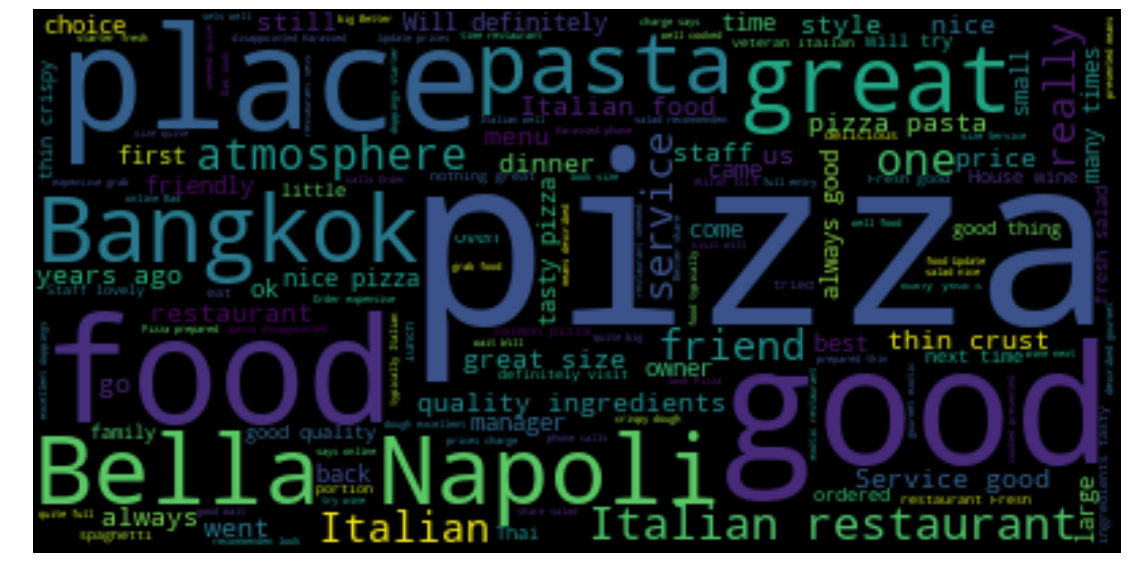

In [50]:
import matplotlib.pyplot as plt

# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
# checking for reviews talking about their coffee
coffee_idxs = []
for i in range(len(df)):
    if 'coffee' in df.iloc[i,1]:
        coffee_idxs.append(df.iloc[i,1])
coffee_idxs

['Pointing to Bella Napoli as a pizzeria is undoubtedly reductive. \nIt\'s not just a pizzeria, but also an excellent Italian restaurant.\n\nGreat selection of pizzas, pasta and main courses. Huge selection of wines.\nAnd a very good coffee.\n\nJust one suggestion: please, return the "pizza...More',
 'Fantastic italian food in delightfull surroundings....owner Mauritsio was very attentive and helpfull with our menu choice\nWe ordered the antipasti which was spectacular followed by pasta and pizza.....both awesome\nGreat bottle of red wine and Tiramisu with coffee and amareto to finish\nLovely meal .....will...More']

In 2 reviews, they talk about their coffee (probably an espresso) in a good way. They also offer Tiramisu, that even if it is not gelato, it's a potential substitute of it.

## Basilico - Ari

In [52]:
URL_BASE = 'https://www.tripadvisor.com/Restaurant_Review-g293916-d3711564-Reviews-Basilico_Pizzeria-Bangkok.html'
MAX_PAGES = 30
counter = 0

for i in range(1, MAX_PAGES):
    if i > 1:
        url = "%spage/%d/" % (URL_BASE, i)
    else:
        url = URL_BASE
    req = requests.get(url)
    statusCode = req.status_code
    if statusCode == 200:
        html = BeautifulSoup(req.text, "html.parser")
        resultsoup = html.find_all('P', {'class': 'partial_entry'})
    else:
        break

for review in resultsoup:
    review_list = review.get_text()
    print(review_list)

# requesting data regarding Pizzeria Basilico
url  = 'https://www.tripadvisor.com/Restaurant_Review-g293916-d3711564-Reviews-Basilico_Pizzeria-Bangkok.html'

In [53]:
s = requests.Session()
start_url = 'https://www.tripadvisor.com/Restaurant_Review-g293916-d3711564-Reviews-Basilico_Pizzeria-Bangkok.html'
results = [] # <--- global list for items
parse(start_url, get_soup(url))

df = pd.DataFrame(results) # <--- convert list to DataFrame

num_reviews: 9 <class 'int'>
template: https://www.tripadvisor.com/Restaurant_Review-g293916-d3711564-Reviews-Basilico_Pizzeria-Bangkok-or{}.html
url: https://www.tripadvisor.com/Restaurant_Review-g293916-d3711564-Reviews-Basilico_Pizzeria-Bangkok-or0.html
review: https://www.tripadvisor.com/Restaurant_Review-g293916-d3711564-Reviews-Basilico_Pizzeria-Bangkok-or0.html
restaurant_name : Basilico Pizzeria
review_title : Please go try this cute Italian restaurant!
review_body : I don't know why this place was empty. But I'm so glad to have eaten here! The pizza was so fresh and delicious, the mussels were so so good! I highly recommend this place to everyone who's looking to try some nice Italian for a...More
----
restaurant_name : Basilico Pizzeria
review_title : Great pizzas (also for take away)
review_body : I love coming here for the pizzas. Also for take away after a long day at the office. Service is good and prices are reasonable.
----
restaurant_name : Basilico Pizzeria
review_tit

In [54]:
df

,restaurant_name,review_body,review_title
0,Basilico Pizzeria,I don't know why this place was empty. But I'm...,Please go try this cute Italian restaurant!
1,Basilico Pizzeria,I love coming here for the pizzas. Also for ta...,Great pizzas (also for take away)
2,Basilico Pizzeria,"This is a great place to go for tasty, varied ...",A quiet birthday supper
3,Basilico Pizzeria,We have come here frequently and it is a relia...,Cozy neighborhood pizza/pasta place
4,Basilico Pizzeria,"I like the place and the food.\nA nice place, ...",A nice Italian restaurant in ARI area
5,Basilico Pizzeria,They should step it up considering the amount ...,Ordinary and uninspired
6,Basilico Pizzeria,"Exemplery Pizzas, Impeccable Service - food, p...","Exemplery Pizzas, Impeccable Service"


In [55]:
text = " ".join(review for review in df['review_body'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1369 words in the combination of all review.


In [56]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

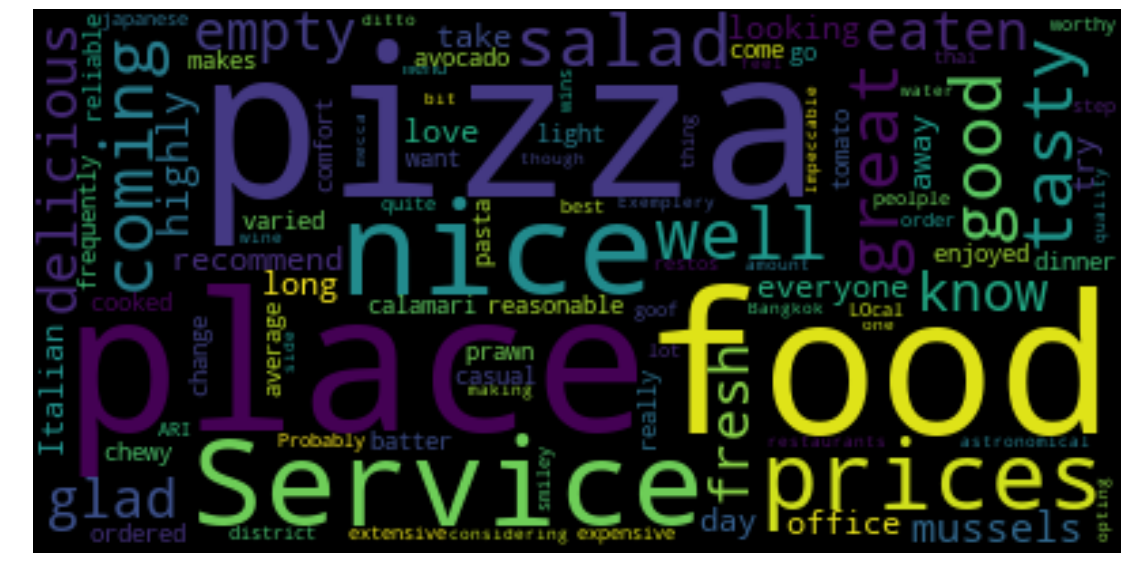

In [57]:
# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion

Basilico, close to the Ari BTS Stop, has only six reviews and its wordcloud is not meaningful. 
In summary, Ari offers gelato and espresso and a Pizza Place that, with a rating of 7.1/10, has only 6 reviews.
Pizzeria Bella Napoli, close to the Thong Lo BTS Stop, has a higher rating of 7.8/10, 472 reviews, with 2 of them 
directly talking of coffee, that in an italian restaurant probably means 'espresso'. The area offers 
other 2 pizza places, one of them with an italian name (Pizzeria Da Luigi).<br>
After analysing these reviews, we may think that actually the Ari BTS stop could be a good choice as well.
In both areas, for different reasons, the competition doesn't look invincible!
<li> Ari: The best and close pizza place, Basilico, has less reviews and a lower rating, but closer to the BTS stop.
<li>Thong Lo: Pizzeria Bella Napoli is appreciated, but it's not so close. There are 2 other pizza places.<br>
    
Both of these places prdon't offer slices of pizza.